In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
#loading dataset
url='/home/umar/ML-AI/datasets/data_banknote_authentication.txt'
dataset=pd.read_csv(url,header=None)
print("Shape of dataset is:",dataset.shape)

Shape of dataset is: (1372, 5)


In [5]:
#converting to 3 decimal places
pd.set_option('precision',3)
dataset.head()

,0,1,2,3,4
0,3.622,8.666,-2.807,-0.447,0
1,4.546,8.167,-2.459,-1.462,0
2,3.866,-2.638,1.924,0.106,0
3,3.457,9.523,-4.011,-3.594,0
4,0.329,-4.455,4.572,-0.989,0


In [6]:
#class distribution 
dataset.groupby(4).size()
# 0=fake, 1=real

4
0    762
1    610
dtype: int64

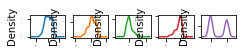

In [7]:
#Unimodal data visualisation
# density distribution graph
dataset.plot(kind='density',subplots=True,layout=(8,8),sharex=False,legend=False,fontsize=1)
pyplot.show()

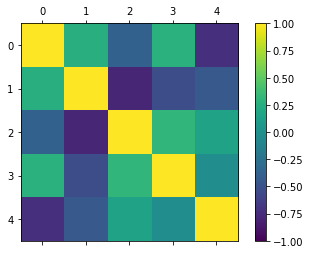

In [8]:
#multimodal data visualisation
#corelation matrix 
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [9]:
#splitting dataset into testing and training
array=dataset.values
X=array[:,0:4] #all the rows, only 0 to 3th colomn for features
Y=array[:,4] # all the rows, only the 4th column of target
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=0.20,random_state=7)

In [10]:
#spot-check
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [11]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR 0.991793 (0.006367)
LDA 0.976264 (0.013118)
KNN 1.000000 (0.000000)
CART 0.980826 (0.016641)
NB 0.841318 (0.049469)
SVM 0.995438 (0.006136)


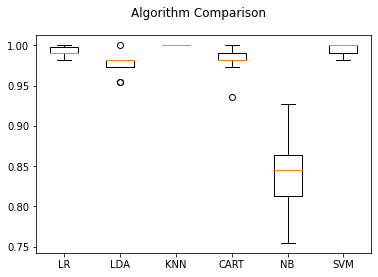

In [12]:
#algorithm comparison
# box and whisker plot
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [13]:
#standardising the data and then training-
pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA',Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))

results = []
names = []
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)


LR 0.991793 (0.006367)
LDA 0.976264 (0.013118)
KNN 1.000000 (0.000000)
CART 0.980826 (0.016641)
NB 0.841318 (0.049469)
SVM 0.995438 (0.006136)


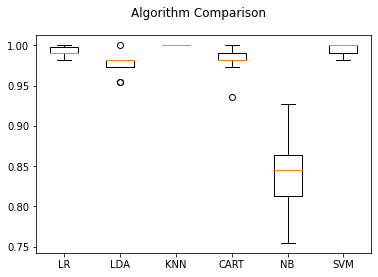

In [14]:
#algorithm comparison after using standardised data
# box and whisker plot
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [15]:
#finalising the model using KNN
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=KNeighborsClassifier()
model.fit(rescaledX,Y_train)

#estimating accuracy
rescaledvalidationX=scaler.fit_transform(X_validation)
predictions=model.predict(rescaledvalidationX)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

1.0
[[158   0]
 [  0 117]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       158
         1.0       1.00      1.00      1.00       117

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

